# Logistic Regression with Python

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score

## Check out the data

In [37]:
titanic_t = pd.read_csv('titanic_test.csv')
titanic_t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
titanic_t.shape

(418, 11)

In [39]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic.shape

(891, 12)

In [41]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

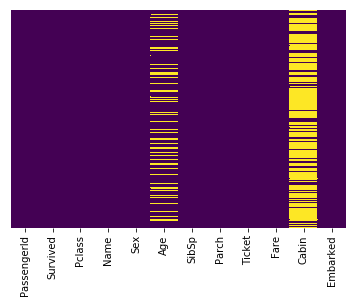

In [43]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this column later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

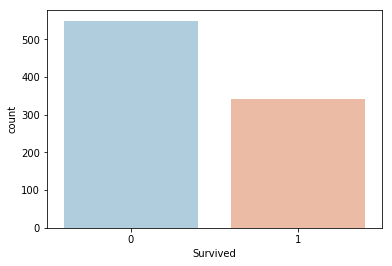

In [44]:
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

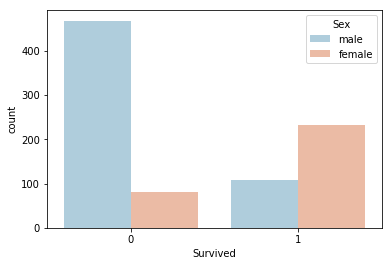

In [45]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

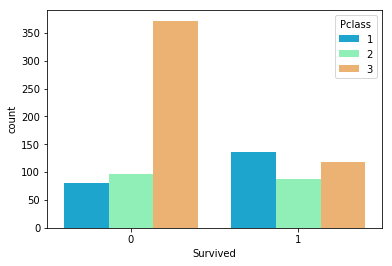

In [46]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

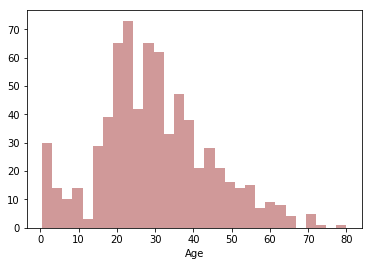

In [47]:
sns.distplot(titanic['Age'],kde=False,color='darkred',bins=30)

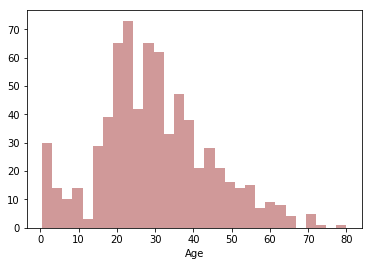

In [48]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30) #it's just showing the graph after dropping the NaN values (rows), but in real the NaN values (rows) are not removed from the dataset.

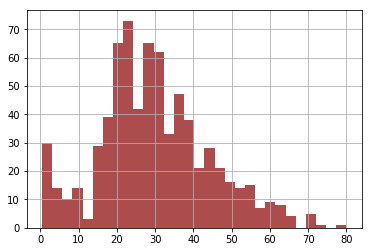

In [49]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

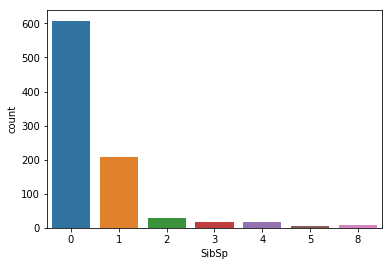

In [50]:
sns.countplot(x='SibSp',data=titanic)

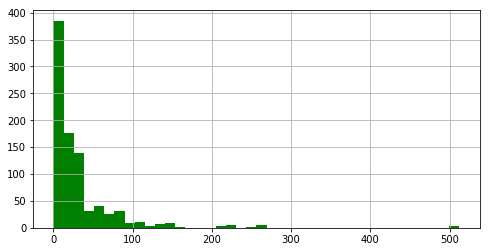

In [51]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

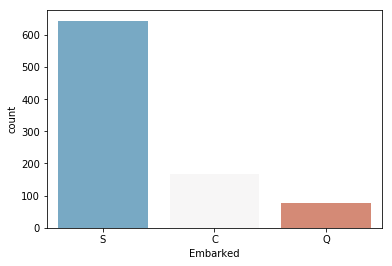

In [52]:
sns.countplot(x='Embarked',data=titanic,palette='RdBu_r')

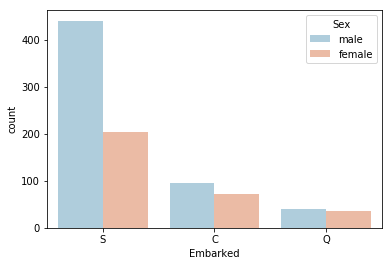

In [53]:
sns.countplot(x='Embarked',hue='Sex',data=titanic,palette='RdBu_r')

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by Pclass (passenger class). For example:

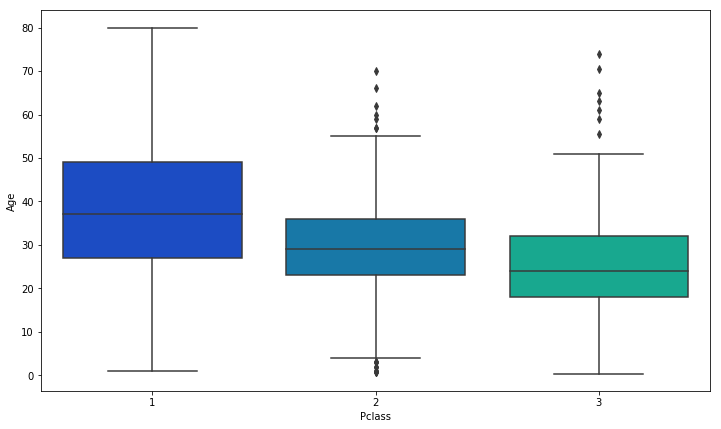

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): # If Age is Null

        if Pclass == 1: # If Age is Null AND Pclass==1, fill Age 37
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [56]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

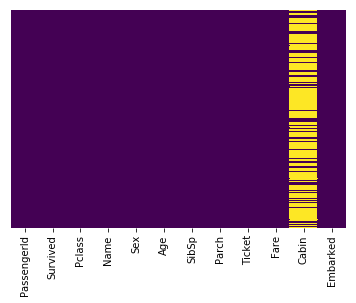

In [57]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [58]:
titanic.drop('Cabin',axis=1,inplace=True) #drop the Cabin column

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
titanic.shape

(891, 11)

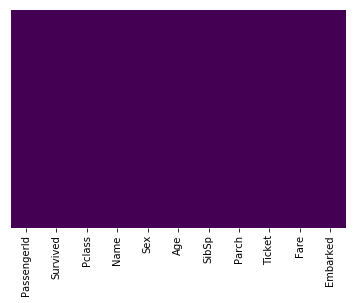

In [61]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [63]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
titanic= pd.concat([titanic,sex,embark],axis=1)

In [67]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Feature Selection
### RFE -Sometimes RFE eliminates a good feature because of the unnormalised initial data.

## Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [75]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=titanic['Survived'], random_state=42, test_size=0.3)

### RFE to select features for a model with 3 features 

In [76]:
model=LogisticRegression()
rfe= RFE(estimator=model, n_features_to_select=3, step=1)
rfe.fit(X_train,y_train)
predictions=rfe.predict(X_test)
print("accuracy score with 3 features: ", accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy score with 3 features:  0.7761194029850746
[[138  27]
 [ 33  70]]


/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [77]:
print(rfe.support_)
print(X_train.columns)

[False  True False False False False  True False  True]
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')


### RFE to select features for a model with 4 features 

In [78]:
model=LogisticRegression()
rfe= RFE(estimator=model, n_features_to_select=4, step=1)
rfe.fit(X_train,y_train)
predictions=rfe.predict(X_test)
print("accuracy score with 4 features: ", accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy score with 4 features:  0.7761194029850746
[[138  27]
 [ 33  70]]


/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [79]:
print(rfe.support_)
print(X_train.columns)

[False  True False False False False  True  True  True]
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')


### RFE to select features for a model with 5 features 

In [80]:
model=LogisticRegression()
rfe= RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X_train,y_train)
predictions=rfe.predict(X_test)
print("accuracy score with 5 features: ", accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

accuracy score with 5 features:  0.8059701492537313
[[146  19]
 [ 33  70]]


/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

In [81]:
print(rfe.support_)
print(X_train.columns)

[False  True False  True False False  True  True  True]
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')


#### Here, 5 selected features are 'Pclass', 'Age', 'SibSp',  'male',  'S'.

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [82]:
titanic.shape

(891, 10)

In [83]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [84]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']
print(X.columns)
print(X.shape)
print(y.shape)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')
(891, 9)
(891,)


## Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=titanic['Survived'], random_state=42, test_size=0.3)
print(train.shape)
print(test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 10)
(268, 10)
(623, 9)
(623,)
(268, 9)
(268,)


## Training and Predicting

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
y_train.value_counts()

0    384
1    239
Name: Survived, dtype: int64

In [89]:
# sns.countplot(x='y_train',data=titanic,palette='RdBu_r')

In [90]:
y_test.value_counts()

0    165
1    103
Name: Survived, dtype: int64

In [91]:
# sns.countplot(x='y_test',data=titanic,palette='RdBu_r')

In [92]:
predictions = logreg.predict(X_test)
print("The test accuracy: ", accuracy_score(y_test, predictions))
print("Our confusion matrix is:-")
print(confusion_matrix(y_test, predictions))

The test accuracy:  0.7947761194029851
Our confusion matrix is:-
[[142  23]
 [ 32  71]]


Let's move on to evaluate our model!

## Evaluation
We can check precision,recall,f1-score using classification report!

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       165
           1       0.76      0.69      0.72       103

   micro avg       0.79      0.79      0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 